<b style="font-size:2vw"><center>Bode Plots</center></b>

<center><i><b>Document by:</b> Matt Capuano <i></center>

I write this document as I review my Bode plots, primarly through these two resources:
- System Dynamics (Ogata) | chapter 7.2
- Control Bootcamp (Steve Brunton) | Lectures 26-...?

We describe the four common factors in transfer functions and how they are reflected/affect Bode plots. These four factors are:
- Changes in a Gain $K$
- Integral and Derivative Factors $(j\omega)^{\mp1}$
- First-Order Factors $(1+j\omega T)^{\mp1}$
- First-Order Factors $\left[1 + 2\zeta \left(\frac{j\omega}{\omega_n}\right) + \left(\frac{j\omega}{omega_n}\right)^2 \right]^{\mp1}$

In [3]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import control.matlab as cmatlab
#import slycot
from scipy import signal

# Plotting settings (to format plots nicely)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Define s as being the transfer function Laplace variable
s = cmatlab.tf('s')

In [75]:
# I'll be using the following example transfer functions:

# Spring-mass-damper system with mass, damping coefficient, and spring constant:
m = 1
d = 0.1
k = 1
G = 1 / (m*(s**2) + d*s + k)

## <center>Changes in a Gain K</center>

Varying a constant multiple in the transfer function raises or lowers the entire log-magnitude curve by the corresponding amount, but it has no effect on the phase angle (unless you change the sign of the constant I believe). The conversion between the change in gain K and the change in decibels is given by:
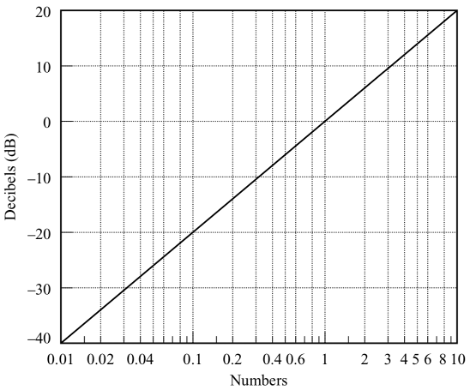


This stems from the equation from magnitude to log-magnitude:
$$
dB = 20 \log_{10}⁡(|G(j\omega)|)
$$

So an increase in magnitude by a factor of 10 corresponds to an increase of the log-magnitude by 20:
$$
20 \log⁡(K × 10^n) = 20 \log⁡(K) + 20n
$$

For instance, consider the following transfer functions for which we are just multiplying by a constant gain $K, notice how the magnitude plot is just shifted up and down, but the phase does not change.

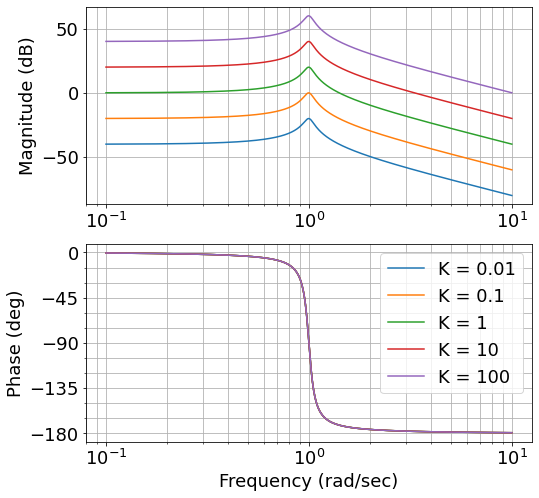

In [76]:
for exp in range(-2, 3):
    K = 10 ** exp
    G1 = K * G
    mag, phase, w = cmatlab.bode(G1, label="K = " + str(K))
plt.legend()

**What if the gain switches sign?**
- Then the magnitude isn't affected because $|G(j\omega)|$ would make it positive anyway.
- But the phase would change, since $tan^{-1}(numerator) - tan^{-1}(denominator)$. How does that affect it? Well think about it on the complex plain, now you've flipped everything in the directly opposite direction, which is like rotationg it by $180^o$

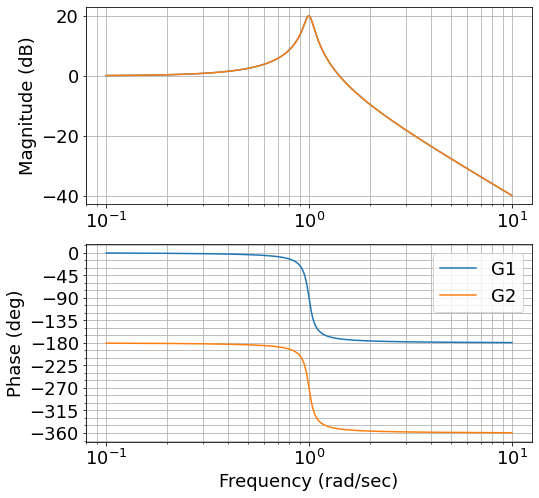

In [78]:
G1 = G
G2 = -1*G

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

## <center>Integral and Derivative Factors $(j\omega)^{\mp1}$</center>

The integral and derivative factors are just negatives of each other.

**Integrator:**
$$
20 \log{\left|\frac{1}{j\omega}\right|} = -20 \log|j\omega| = -20 \log|\omega|
$$

**Derivative:**
$$
20 \log|j\omega| = 20 \log|\omega|
$$


They have slope of 20 and -20 on the magnitude plot respectively. Both cross the point $(\omega, dB) = (1, 0)$, as you can see from the equations above. The phase of $j\omega$ is $tan^{-1}(j\omega)$, which is directly on the imaginary axis, so it has angle $90^o$. This means the integrator has phase $-90^o$ and the derivative has phase $90^o$.

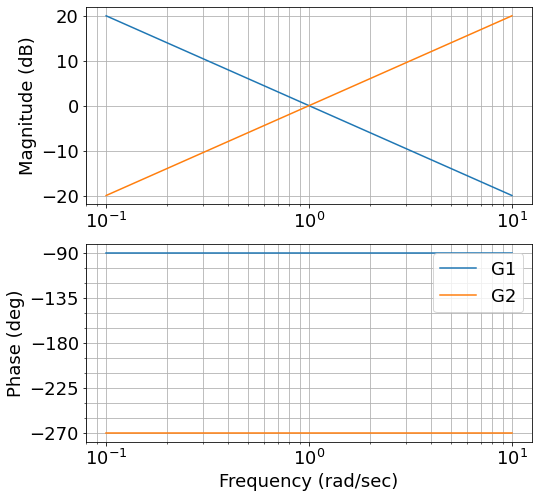

In [79]:
G1 = 1 / s
G2 = s

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

### Powers of Integral & Derivative Terms $(j\omega)^{\mp n}$

Then:

**Integrator:**
$$
20 \log{\left|\frac{1}{(j\omega)^{n}}\right|} = -20 \log|(j\omega)^{n}| = -20n \log|\omega|
$$

**Derivative:**
$$
20 \log|(j\omega)^{n}| = 20n \log|\omega|
$$

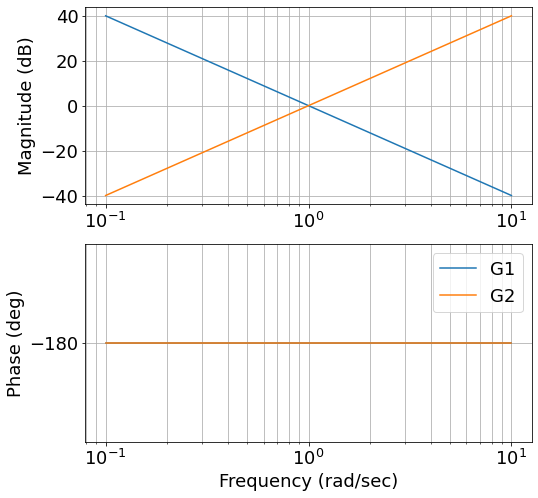

In [80]:
n = 2
G1 = 1 / (s**n)
G2 = (s**n)

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

## <center>First-Order Factors $(1+j\omega T)^{\mp1}$</center>

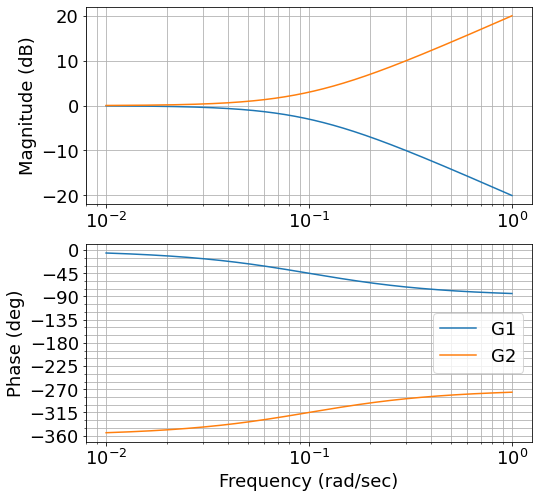

In [81]:
T = 10 # Defining the corner frequency as 1/T
G1 = 1 / (1 + T*s)
G2 = 1 + T*s

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

### Adjusting the Time Constant $T$
This just shifts the corner frequency right or left.

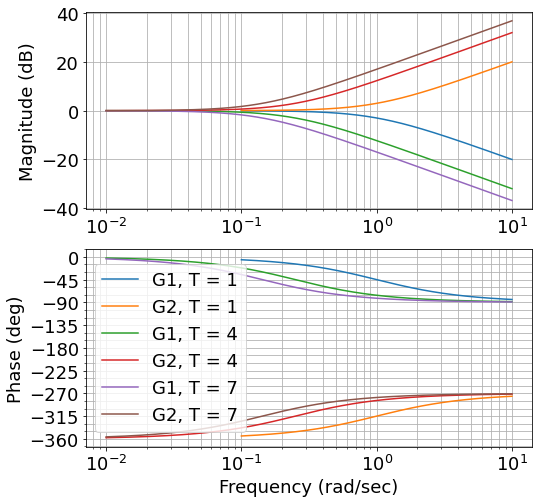

In [82]:
for T in range(1, 10, 3):
    G1 = 1 / (1 + T*s)
    G2 = 1 + T*s
    mag, phase, w = cmatlab.bode(G1, label='G1, T = ' + str(T))
    mag, phase, w = cmatlab.bode(G2, label='G2, T = ' + str(T))
plt.legend()

### Powers of First-Order Terms $(1+j\omega T)^{\mp n}$</center>

Taking the First-Order factor to the power of n mutlplies the high-frequency region slope and phase angle by n

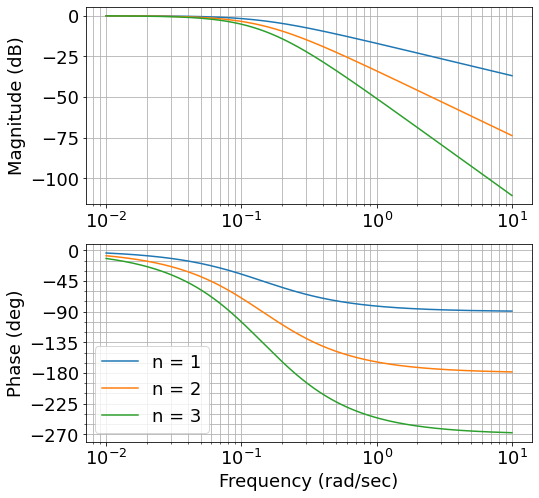

In [87]:
for n in range (1, 4, 1):
    G = 1 / ((1 + T*s)**n)
    mag, phase, w = cmatlab.bode(G, label='n = ' + str(n))

plt.legend()

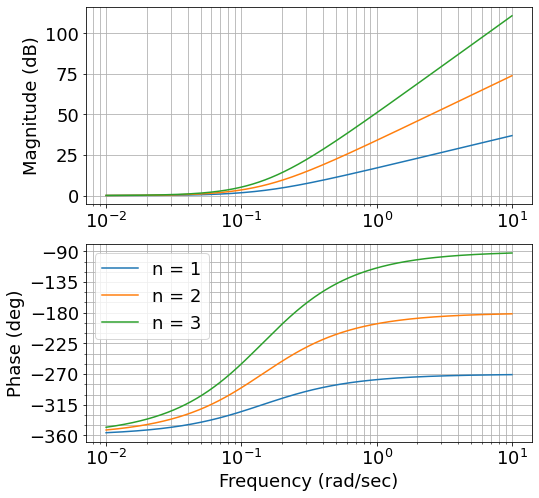

In [88]:
for n in range (1, 4, 1):
    G = (1 + (T*s))**n
    mag, phase, w = cmatlab.bode(G, label='n = ' + str(n))
    
plt.legend()

## <center>Second-Order Factors $\left[1 + 2\zeta \left(\frac{j\omega}{\omega_n}\right) + \left(\frac{j\omega}{\omega_n}\right)^2 \right]^{\mp1}$</center>

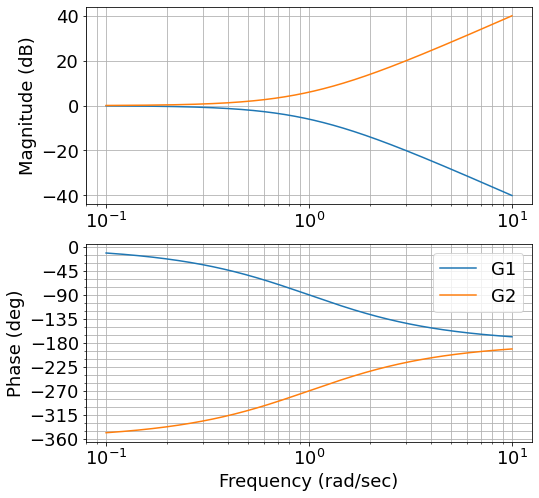

In [89]:
z = 1
omega_n = 1
G1 = 1 / (1 + (2*z*s/omega_n) + (s/omega_n)**2)
G2 = (1 + (2*z*s/omega_n) + (s/omega_n)**2)

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

### Changing the Damping Coefficient $\zeta$

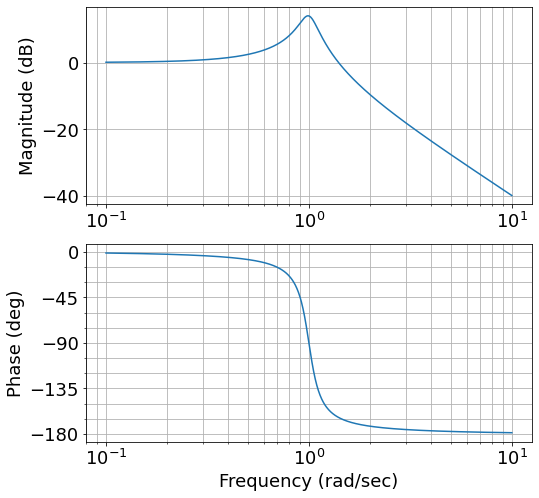

In [99]:
zeta = 0.1
G = 1 / (1 + (2*zeta*s/omega_n) + (s/omega_n)**2)
mag, phase, w = cmatlab.bode(G, label='$\zeta$ = ' + str(zeta))

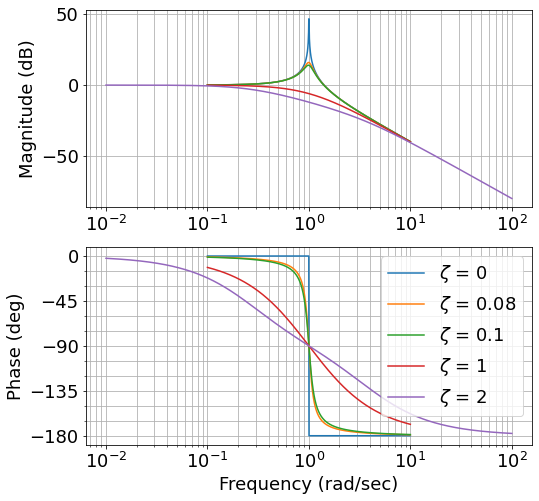

In [105]:
omega_n = 1
for zeta in [0, 0.08, 0.1, 1, 2]:
    G = 1 / (1 + (2*zeta*s/omega_n) + (s/omega_n)**2)
    mag, phase, w = cmatlab.bode(G, label='$\zeta$ = ' + str(zeta))
plt.legend()

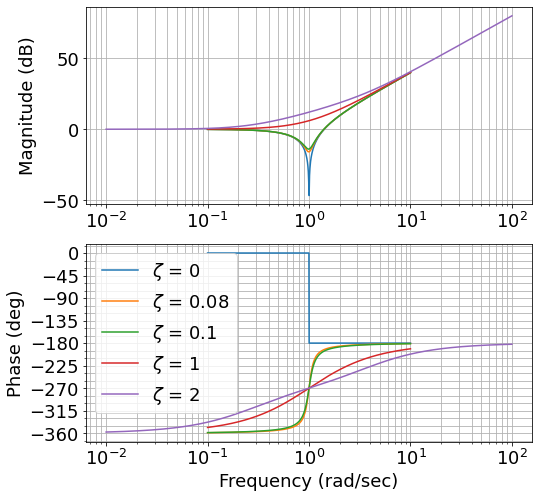

In [106]:
omega_n = 1
for zeta in [0, 0.08, 0.1, 1, 2]:
    G = (1 + (2*zeta*s/omega_n) + (s/omega_n)**2)
    mag, phase, w = cmatlab.bode(G, label='$\zeta$ = ' + str(zeta))
plt.legend()

## <center>Minimum & Non-Minimum Phase Systems</center>

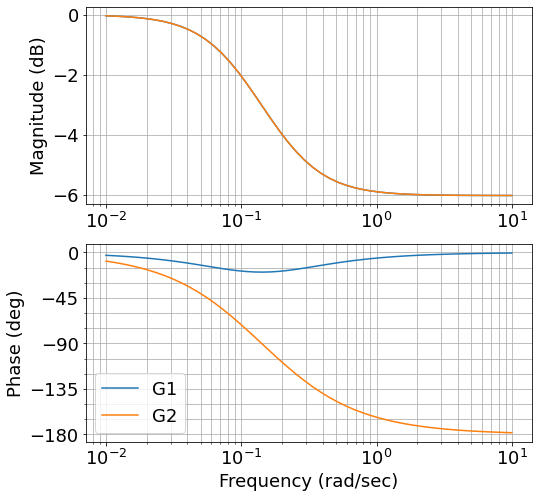

In [55]:
T = 5
T1 = 10
G1 = (1 + T * s) / (1 + T1 * s)
G2 = (1 - T * s) / (1 + T1 * s)

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

In [66]:
import math
T = 1
L = 0.5
G = math.exp(-1*s*L) / (1 + s*T)

TypeError: must be real number, not TransferFunction

In [61]:
math.exp(1)

2.718281828459045

## <center>More Complex Examples</center>

As a general rule, taking the reciprocal of a transfer function flips the signs of both the magnitude and phase plots:

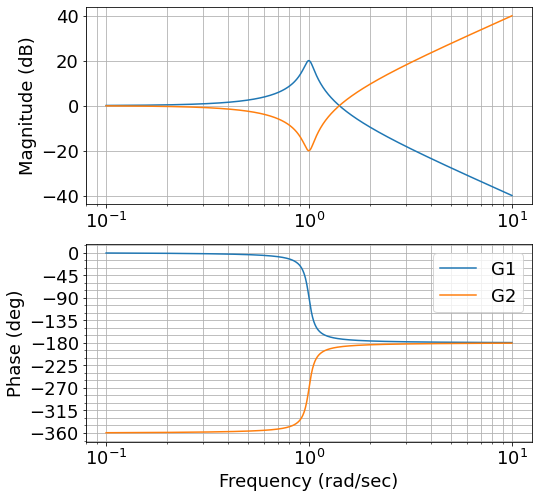

In [63]:
G1 = G
G2 = 1 / G

mag, phase, w = cmatlab.bode(G1, label='G1')
mag, phase, w = cmatlab.bode(G2, label='G2')
plt.legend()

## <center>Filters</center>

[]

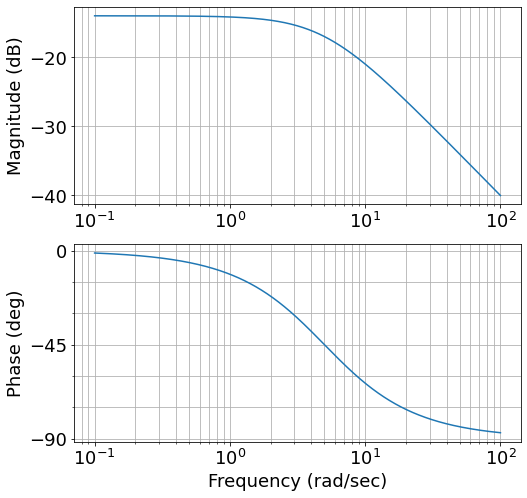

In [6]:
# First-order Low-pass filter
G = 1/(s+5)
cmatlab.bode(G)
plt.plot()

[]

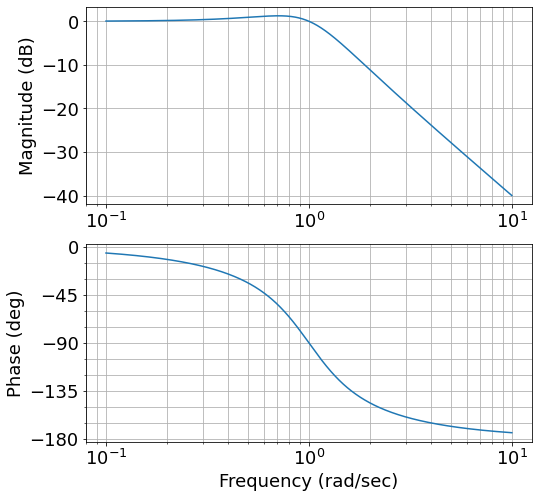

In [7]:
# Second-order low-pass filter
G = 1/(s**2 + s + 1)
cmatlab.bode(G)
plt.plot()

[]

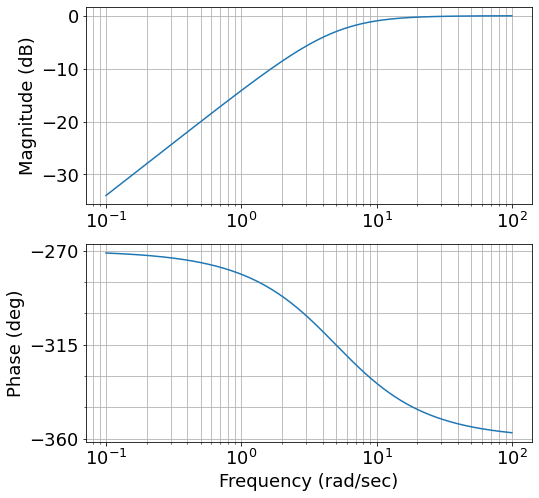

In [5]:
# Hih-pass filter
G = s/(s+5)
cmatlab.bode(G)
plt.plot()